## **Model Explainability with LIME (Local Interpretable Model-Agnostic Explanations)**
- https://github.com/marcotcr/lime


In [1]:
#https://www.youtube.com/watch?v=Op2M5CpJehM
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.12.0


In [2]:
inet_model = inc_net.InceptionV3()

96112376/96112376 [==============================] - 2s 0us/step


In [3]:
import tensorflow as tf
import keras

In [4]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = tf.keras.utils.load_img(img_path, target_size=(299, 299))
        x =tf.keras.utils.img_to_array(
    img, data_format=None, dtype=None
)
        #x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

In [5]:
from google.colab import files
uploaded = files.upload()


Saving Cobra.jpg to Cobra.jpg


In [6]:
!ls

Cobra.jpg  sample_data


35363/35363 [==============================] - 0s 0us/step
('n01748264', 'Indian_cobra', 0.9328579)
('n01751748', 'sea_snake', 0.0031050292)
('n01753488', 'horned_viper', 0.002581882)
('n03527444', 'holster', 0.0019722541)
('n01749939', 'green_mamba', 0.0011305754)


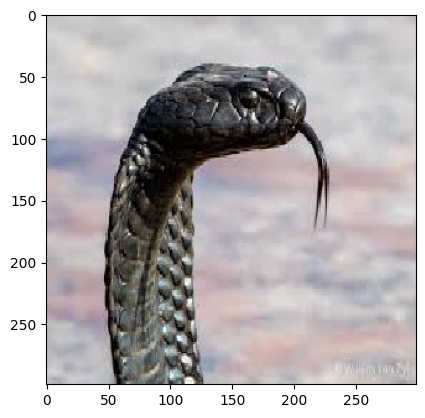

In [8]:
#images = transform_img_fn([os.path.join('/content','elephant.jpg')])
images = transform_img_fn([os.path.join('Cobra.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [9]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=d98676b666562e72a9f2a178d015588d0cf947771e2849158d10860daa395652
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [10]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

In [11]:
explainer = lime_image.LimeImageExplainer()

In [12]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step
CPU times: user 6min 55s, sys: 8.47 s, total: 7min 3s
Wall time: 5min 19s


In [13]:
explanation

In [14]:
from skimage.segmentation import mark_boundaries

# **Superpixel for the top most Prediction**

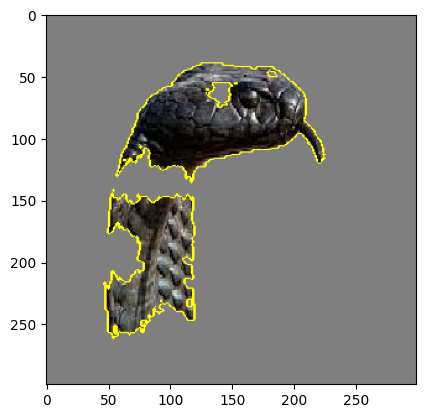

In [15]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

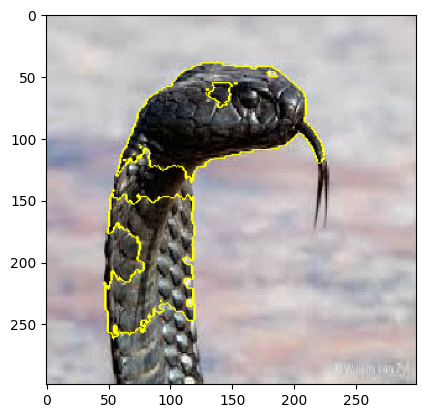

In [16]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

# **Visualizing 'pros and cons'**
- pros in green
- cons in red

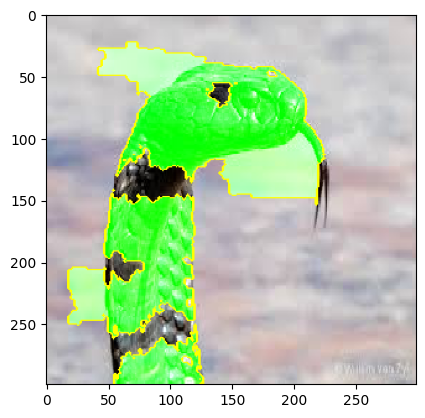

In [17]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## **pros and cons**
 - With weight at least 0.1

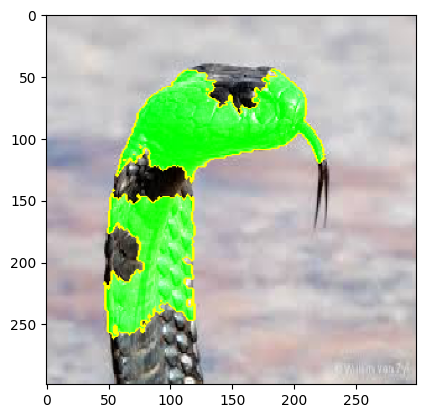

In [18]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## **Explaination Heatmap plot with weights**
- Colorbar shows the values of the weights.

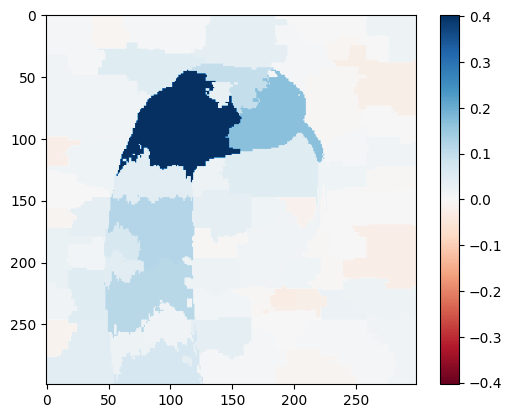

In [19]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# **Second Prediction in the list**

## **Superpixel for the second most Prediction**

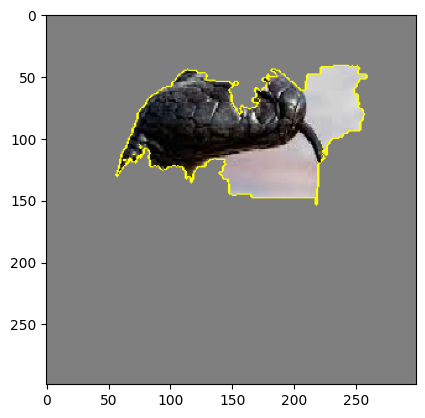

In [20]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## **Rest of the image from the second prediction**

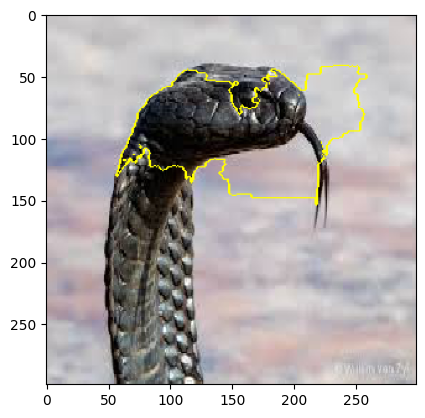

In [21]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## **Visualizing 'pros and cons'**
- pros in green
- cons in red

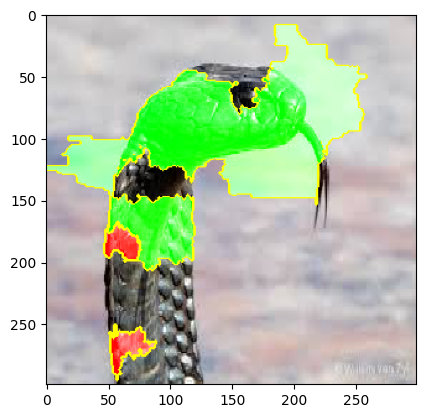

In [22]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## **pros and cons** 
 - that have weight at least 0.1

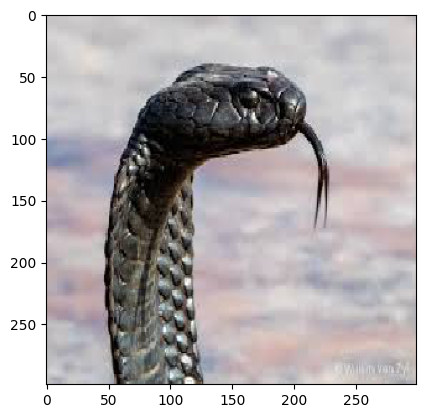

In [23]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## **Explanation Heatmap plot with weights**
- Colorbar shows the values of the weights.

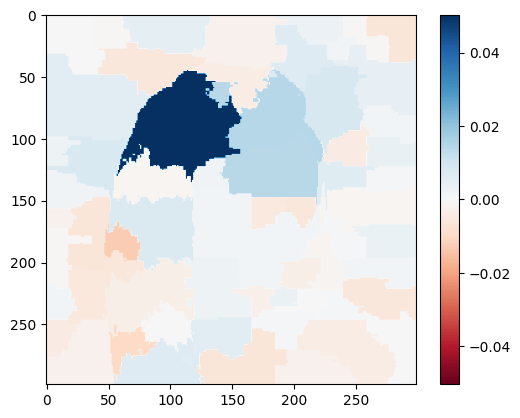

In [24]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[1]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()